In [47]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [48]:
df = pd.read_csv('Cars_mileage.csv')

In [49]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [50]:
df.isnull()

,HP,MPG,VOL,SP,WT
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
76,False,False,False,False,False
77,False,False,False,False,False
78,False,False,False,False,False
79,False,False,False,False,False


In [51]:
df.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [52]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [53]:
df.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


In [54]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<AxesSubplot:>

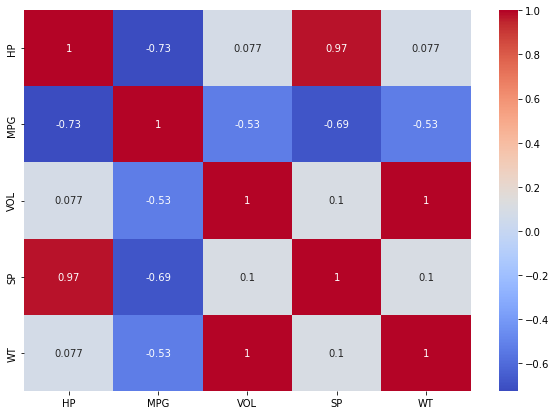

In [55]:
plt.subplots(figsize = ([10,7]))
sn.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
#Y=MX+C

In [56]:
y = df.loc[:,['MPG']] # Dependent variable
X = df.loc[:,['HP','VOL','SP','WT']]  # Independent variable

In [57]:
print(X)

     HP  VOL          SP         WT
0    49   89  104.185353  28.762059
1    55   92  105.461264  30.466833
2    55   92  105.461264  30.193597
3    70   92  113.461264  30.632114
4    53   92  104.461264  29.889149
..  ...  ...         ...        ...
76  322   50  169.598513  16.132947
77  238  115  150.576579  37.923113
78  263   50  151.598513  15.769625
79  295  119  167.944460  39.423099
80  236  107  139.840817  34.948615

[81 rows x 4 columns]


In [58]:
print(y)

          MPG
0   53.700681
1   50.013401
2   50.013401
3   45.696322
4   50.504232
..        ...
76  36.900000
77  19.197888
78  34.000000
79  19.833733
80  12.101263

[81 rows x 1 columns]


In [59]:
df_x = df.drop(['MPG'],axis = 1)

In [60]:
df_x


,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [61]:
df_y = df['MPG']
df_y

0     53.700681
1     50.013401
2     50.013401
3     45.696322
4     50.504232
        ...    
76    36.900000
77    19.197888
78    34.000000
79    19.833733
80    12.101263
Name: MPG, Length: 81, dtype: float64

## Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
df_x_std = StandardScaler().fit_transform(df_x)
print(df_x_std)

[[-1.20629511 -0.44061061 -1.23140253 -0.49023816]
 [-1.1005866  -0.30525236 -1.14087145 -0.26129934]
 [-1.1005866  -0.30525236 -1.14087145 -0.29799301]
 [-0.83631531 -0.30525236 -0.57323872 -0.2391033 ]
 [-1.13582277 -0.30525236 -1.21182554 -0.33887816]
 [-0.83631531 -0.44061061 -0.59281571 -0.37881419]
 [-1.1005866  -0.30525236 -1.14087145 -0.28256505]
 [-0.97726    -2.20026792 -1.34399532 -2.22453536]
 [-0.97726    -2.20026792 -1.34399532 -2.15581433]
 [-0.66013445 -0.21501352 -0.4182792  -0.20042158]
 [-0.78346105 -0.44061061 -0.73472389 -0.40949027]
 [-0.44871742 -2.20026792 -0.27968395 -2.23718888]
 [-0.44871742  0.01058357  0.04007367  0.05385348]
 [-0.78346105 -0.44061061 -0.73472389 -0.40746314]
 [-0.90678765 -0.44061061 -0.94758617 -0.41164734]
 [-0.78346105 -0.44061061 -0.73472389 -0.37710085]
 [-0.69537062 -0.35037178 -0.50881029 -0.38633253]
 [-0.44871742 -2.20026792 -0.27968395 -2.17802125]
 [-0.69537062 -0.35037178 -0.50881029 -0.33347355]
 [-0.48395359  0.19106124 -0.21

## Training the PCA

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [64]:
principalComponents = pca.fit_transform(df_x_std)
principalDf = pd.DataFrame(data = principalComponents,columns = ['PC1','PC2'])
print(principalDf)


         PC1       PC2
0  -1.656387 -0.813003
1  -1.373408 -0.886849
2  -1.392395 -0.869168
3  -0.959245 -0.469071
4  -1.464933 -0.904181
..       ...       ...
76  1.107860  5.744346
77  2.777448  1.456332
78 -0.035026  4.570509
79  4.054085  2.428302
80  1.995486  1.415172

[81 rows x 2 columns]


## Splitting the data into training and test data


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.3)

## Linear regression

In [66]:
from sklearn.linear_model import LinearRegression
cls = LinearRegression()

In [67]:
cls.fit(X_train, y_train)

LinearRegression()

## Accuracy score

In [68]:
r2_score = cls.score(X_test,y_test)

In [69]:
print(r2_score)


0.7201098319711875


In [70]:
print(r2_score*100,'%')


72.01098319711875 %


## Model evaluation

In [76]:
Training_Score=print('Training_Score:',cls.score(X_train,y_train))

Training_Score: 0.7779191235391989


In [ ]:
# Rough part

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1       # add a 1 if the cutoff was breached


In [ ]:
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1


In [ ]:
confusion_matrix(y_test_classes, y_pred_classes)
